In [ ]:
import pandas as pd
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
#missing values in the dataset
insurance_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

(array([4.8238e+04, 1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01]),
 array([-2.0000e+00,  4.8630e+02,  9.7460e+02,  1.4629e+03,  1.9512e+03,
         2.4395e+03,  2.9278e+03,  3.4161e+03,  3.9044e+03,  4.3927e+03,
         4.8810e+03]),
 <a list of 10 Patch objects>)

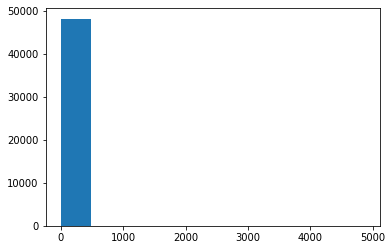

In [ ]:
plt.hist(insurance_data['Duration'])

In [ ]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [ ]:
#Fill the missing values in 'Gender' column with 'Not Specified'
insurance_data['Gender'] = insurance_data['Gender'].fillna('Not Specified')

In [ ]:
#Drop 'Distribution Channel', 'Destination' and 'Agency Type'.
insurance_data = insurance_data.drop(['Distribution Channel', 'Destination', 'Agency Type'],axis = 1)

In [ ]:
data = insurance_data.copy()

In [ ]:
col = ['Agency','Gender','Product Name']
data = pd.get_dummies(data, columns = col)

In [ ]:
data.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = data.drop(['Claim'], axis = 1)

In [ ]:
y = data.Claim

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_sample(x_test, y_test.ravel())

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_res, y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print("training accuracy", lr.score(X_train_res, y_train_res))
print("test accuracy", lr.score(X_test_res, y_test_res))
pre_tra = lr.predict(X_train_res)
pre_tes = lr.predict(X_test_res)
print("Training F1 score:", f1_score(y_train_res, pre_tra))
print("Test F1 score:", f1_score(y_test_res, pre_tes))

training accuracy 0.8500643500643501
test accuracy 0.8630455559095254
Training F1 score: 0.8370545994166511
Test F1 score: 0.8531712148638957


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1).fit(X_train_res,y_train_res)

In [ ]:
print("training accuracy", dtc.score(X_train_res, y_train_res))
print("test accuracy", dtc.score(X_test_res, y_test_res))
pre_tra = dtc.predict(X_train_res)
pre_tes = dtc.predict(X_test_res)
print("Training F1 score:", f1_score(y_train_res, pre_tra))
print("Test F1 score:", f1_score(y_test_res, pre_tes))

training accuracy 0.9943497504473114
test accuracy 0.8524052245938197
Training F1 score: 0.9943511689941943
Test F1 score: 0.8324957518348457


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1).fit(X_train_res, y_train_res)

In [ ]:
print("training accuracy", rfc.score(X_train_res, y_train_res))
print("test accuracy", rfc.score(X_test_res, y_test_res))
pre_tra = rfc.predict(X_train_res)
pre_tes = rfc.predict(X_test_res)
print("Training F1 score:", f1_score(y_train_res, pre_tra))
print("Test F1 score:", f1_score(y_test_res, pre_tes))

training accuracy 0.9943497504473114
test accuracy 0.8617712647339917
Training F1 score: 0.9943612555604285
Test F1 score: 0.8441507129772637


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_1 = {'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200],

 } 

rfc = RandomForestClassifier(random_state=1)
CV_rfc1 = GridSearchCV(estimator=rfc, param_grid=param_grid_1, cv = 3, n_jobs = -1, verbose = 2)
CV_rfc1.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
param_grid_2 = {'max_leaf_nodes': [5, 10, 15, 20],
'min_samples_split': [4, 6, 8, 10]

 } 

rfc = RandomForestClassifier(random_state=1)
CV_rfc2 = GridSearchCV(estimator=rfc, param_grid=param_grid_2, cv = 3,n_jobs = -1, verbose = 2)
CV_rfc2.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_split': [4, 6, 8, 10]},
             verbose=2)

In [ ]:
print(CV_rfc1.best_params_)
print(CV_rfc2.best_params_)

{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
{'max_leaf_nodes': 20, 'min_samples_split': 4}


In [ ]:
pre_tes1 = CV_rfc1.predict(X_test_res)
pre_tes2 = CV_rfc2.predict(X_test_res)
print("1 Test F1 score:", f1_score(y_test_res, pre_tes1))
print("2 Test F1 score:", f1_score(y_test_res, pre_tes2))

1 Test F1 score: 0.8564571347898211
2 Test F1 score: 0.8414101258336892


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfc = RandomForestClassifier(random_state=1)
selector = RFE(rfc, step=1)
selector = selector.fit(X_train_res, y_train_res)

In [ ]:
X_train_res.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,7,16.0,4.00,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,75,15.0,0.00,32,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,20.0,0.00,38,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57,71.0,0.00,24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,72.5,18.13,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("test accuracy", selector.score(X_test_res, y_test_res))
pre_tes = elector.predict(X_test_res)
print("Test F1 score:", f1_score(y_test_res, pre_tes))

test accuracy 0.8377190187957948
Test F1 score: 0.8123203890649178
